# El Yazısı ve Kişilik Analizi

Giriş
Bu not defteri, el yazısı örneklerini kişilik özellikleriyle birleştiren bir veri kümesini incelemektedir. Yazım özellikleri ile kişilik ölçümleri arasındaki bağlantıları ortaya çıkarma olasılığı bizi heyecanlandırıyor. Ayrıca, cinsiyeti sayısal öngörücülere göre sınıflandırmak için bir öngörü modeli oluşturacağız.

<img src='el-yazisi.jpg' width=1000>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

Dataset: https://www.kaggle.com/code/devraai/handwriting-and-personality-analysis/input

In [5]:
df=pd.read_csv('handwriting_personality_large_dataset.csv')

In [6]:
df.head()

,Handwriting_Sample,Writing_Speed_wpm,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,Age,Feature_1,...,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15
0,sample_1.jpg,60,0.357203,0.407442,0.724947,0.451517,0.255107,Male,45,0.146139,...,0.985927,0.745626,0.923922,0.039155,0.277361,0.832098,0.319128,0.199213,0.241081,0.375978
1,sample_2.jpg,32,0.730250,0.051950,0.351615,0.528413,0.664159,Male,36,0.802833,...,0.893979,0.114380,0.484167,0.022397,0.436322,0.908627,0.220744,0.650947,0.568464,0.660062
2,sample_3.jpg,10,0.836987,0.162227,0.164681,0.816008,0.681870,Other,34,0.452513,...,0.941274,0.950571,0.485661,0.277388,0.873560,0.566973,0.205402,0.537800,0.323519,0.373358
3,sample_4.jpg,12,0.413419,0.363059,0.131564,0.938350,0.236702,Male,26,0.832662,...,0.831041,0.217244,0.351701,0.464859,0.867758,0.298407,0.350210,0.591122,0.802049,0.131324
4,sample_5.jpg,11,0.616046,0.247899,0.909740,0.698966,0.463774,Other,57,0.927785,...,0.797505,0.186378,0.113623,0.299514,0.295555,0.365065,0.210633,0.723195,0.044085,0.014351


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Handwriting_Sample  2000 non-null   object 
 1   Writing_Speed_wpm   2000 non-null   int64  
 2   Openness            2000 non-null   float64
 3   Conscientiousness   2000 non-null   float64
 4   Extraversion        2000 non-null   float64
 5   Agreeableness       2000 non-null   float64
 6   Neuroticism         2000 non-null   float64
 7   Gender              2000 non-null   object 
 8   Age                 2000 non-null   int64  
 9   Feature_1           2000 non-null   float64
 10  Feature_2           2000 non-null   float64
 11  Feature_3           2000 non-null   float64
 12  Feature_4           2000 non-null   float64
 13  Feature_5           2000 non-null   float64
 14  Feature_6           2000 non-null   float64
 15  Feature_7           2000 non-null   float64
 16  Featur

In [8]:
df.isnull().sum()

Handwriting_Sample    0
Writing_Speed_wpm     0
Openness              0
Conscientiousness     0
Extraversion          0
Agreeableness         0
Neuroticism           0
Gender                0
Age                   0
Feature_1             0
Feature_2             0
Feature_3             0
Feature_4             0
Feature_5             0
Feature_6             0
Feature_7             0
Feature_8             0
Feature_9             0
Feature_10            0
Feature_11            0
Feature_12            0
Feature_13            0
Feature_14            0
Feature_15            0
dtype: int64

In [9]:
df.describe()

,Writing_Speed_wpm,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Age,Feature_1,Feature_2,Feature_3,...,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,34.900000,0.503219,0.502095,0.493354,0.490680,0.503803,38.751500,0.503997,0.492777,0.508239,...,0.498530,0.496890,0.502151,0.498275,0.505503,0.504867,0.505416,0.509289,0.497657,0.498250
std,14.768414,0.287720,0.291960,0.293293,0.292162,0.292868,12.529734,0.287304,0.286203,0.296206,...,0.289254,0.289650,0.281998,0.288308,0.287664,0.288185,0.294551,0.289205,0.287722,0.290392
min,10.000000,0.000037,0.000605,0.000198,0.000789,0.000110,18.000000,0.000479,0.000793,0.000135,...,0.001007,0.000148,0.001222,0.000222,0.000843,0.000323,0.000050,0.000634,0.000345,0.000918
25%,22.000000,0.254561,0.246555,0.243421,0.233976,0.247184,28.000000,0.261520,0.241847,0.249210,...,0.252276,0.242433,0.262403,0.243199,0.252356,0.258635,0.241708,0.258933,0.246345,0.248844
50%,35.000000,0.508950,0.504160,0.476727,0.483812,0.507146,39.000000,0.502912,0.485657,0.501794,...,0.500330,0.495676,0.500341,0.510724,0.513252,0.497122,0.512706,0.515591,0.495170,0.503213
75%,48.000000,0.751699,0.762965,0.752892,0.746059,0.762267,50.000000,0.756874,0.743896,0.777154,...,0.748912,0.741394,0.745145,0.739032,0.757422,0.750332,0.758985,0.763963,0.746084,0.748253
max,60.000000,0.999517,0.999958,0.999905,0.999878,0.999999,60.000000,0.999336,0.999978,0.999724,...,0.998733,0.999867,0.999286,0.999588,0.999751,0.999881,0.999947,0.997266,0.999228,0.999675


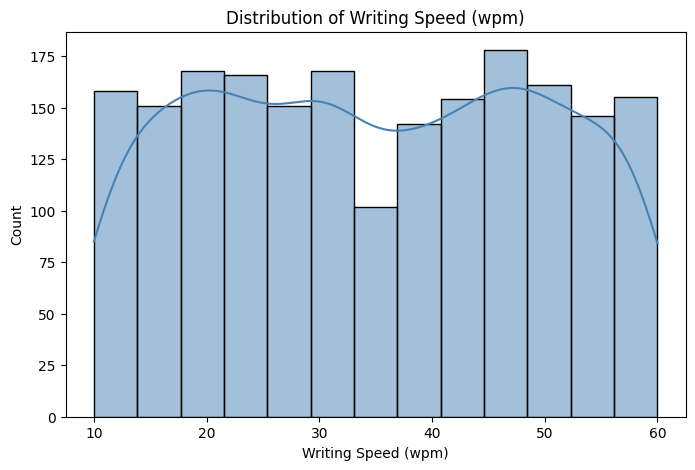

In [10]:
# Plot histogram for writing speed
plt.figure(figsize=(8, 5))
sns.histplot(df['Writing_Speed_wpm'], kde=True, color='steelblue')
plt.title('Distribution of Writing Speed (wpm)')
plt.xlabel('Writing Speed (wpm)')
plt.ylabel('Count')
plt.show()

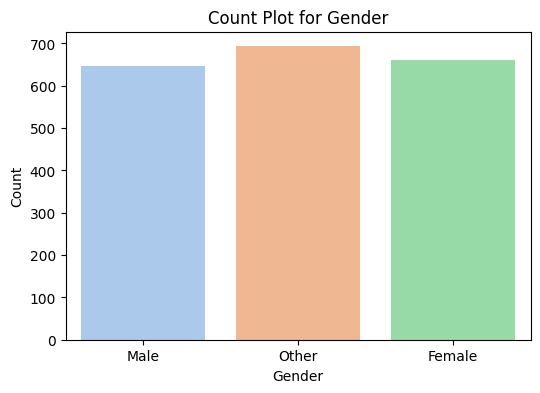

In [11]:
# Count plot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Count Plot for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [12]:
#sns.pairplot(df)

In [13]:
df.head()

,Handwriting_Sample,Writing_Speed_wpm,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,Age,Feature_1,...,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15
0,sample_1.jpg,60,0.357203,0.407442,0.724947,0.451517,0.255107,Male,45,0.146139,...,0.985927,0.745626,0.923922,0.039155,0.277361,0.832098,0.319128,0.199213,0.241081,0.375978
1,sample_2.jpg,32,0.730250,0.051950,0.351615,0.528413,0.664159,Male,36,0.802833,...,0.893979,0.114380,0.484167,0.022397,0.436322,0.908627,0.220744,0.650947,0.568464,0.660062
2,sample_3.jpg,10,0.836987,0.162227,0.164681,0.816008,0.681870,Other,34,0.452513,...,0.941274,0.950571,0.485661,0.277388,0.873560,0.566973,0.205402,0.537800,0.323519,0.373358
3,sample_4.jpg,12,0.413419,0.363059,0.131564,0.938350,0.236702,Male,26,0.832662,...,0.831041,0.217244,0.351701,0.464859,0.867758,0.298407,0.350210,0.591122,0.802049,0.131324
4,sample_5.jpg,11,0.616046,0.247899,0.909740,0.698966,0.463774,Other,57,0.927785,...,0.797505,0.186378,0.113623,0.299514,0.295555,0.365065,0.210633,0.723195,0.044085,0.014351


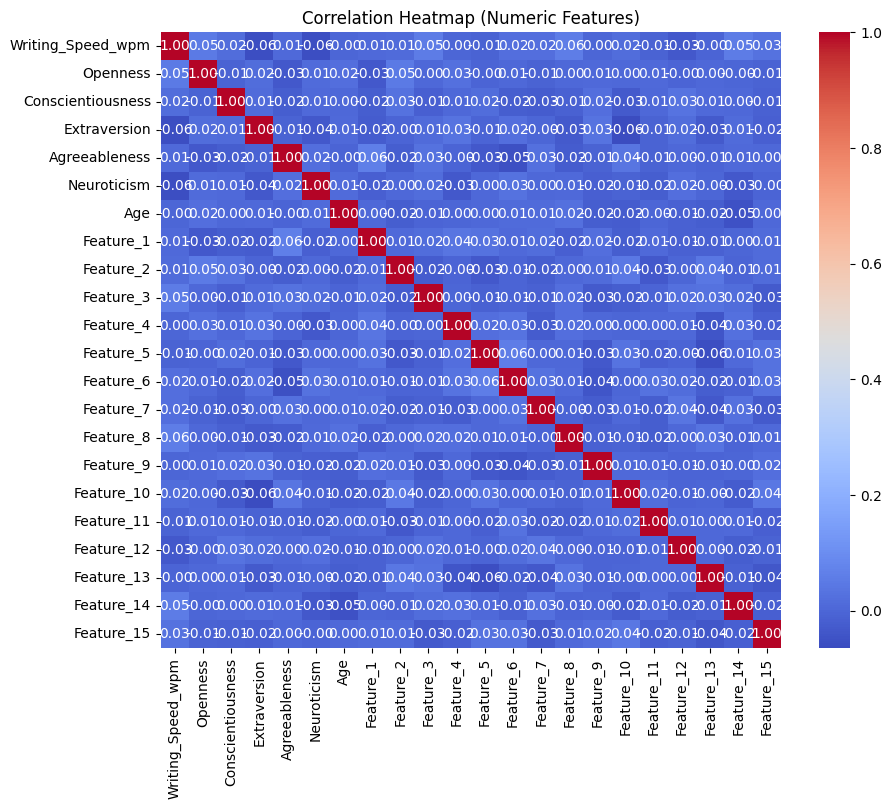

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap (Numeric Features)')
    plt.show()

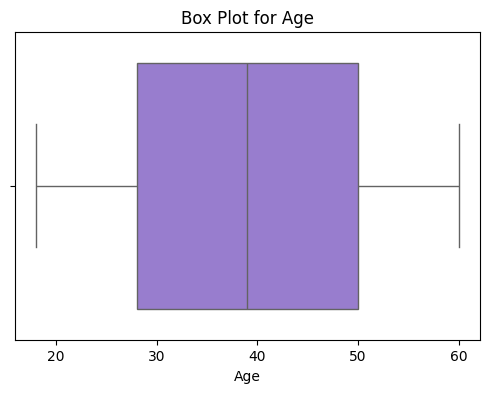

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'], color='mediumpurple')
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()

## Feature Engineering

In [17]:
df.head()

,Handwriting_Sample,Writing_Speed_wpm,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,Age,Feature_1,...,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15
0,sample_1.jpg,60,0.357203,0.407442,0.724947,0.451517,0.255107,Male,45,0.146139,...,0.985927,0.745626,0.923922,0.039155,0.277361,0.832098,0.319128,0.199213,0.241081,0.375978
1,sample_2.jpg,32,0.730250,0.051950,0.351615,0.528413,0.664159,Male,36,0.802833,...,0.893979,0.114380,0.484167,0.022397,0.436322,0.908627,0.220744,0.650947,0.568464,0.660062
2,sample_3.jpg,10,0.836987,0.162227,0.164681,0.816008,0.681870,Other,34,0.452513,...,0.941274,0.950571,0.485661,0.277388,0.873560,0.566973,0.205402,0.537800,0.323519,0.373358
3,sample_4.jpg,12,0.413419,0.363059,0.131564,0.938350,0.236702,Male,26,0.832662,...,0.831041,0.217244,0.351701,0.464859,0.867758,0.298407,0.350210,0.591122,0.802049,0.131324
4,sample_5.jpg,11,0.616046,0.247899,0.909740,0.698966,0.463774,Other,57,0.927785,...,0.797505,0.186378,0.113623,0.299514,0.295555,0.365065,0.210633,0.723195,0.044085,0.014351


In [18]:
df['Gender'].value_counts()

Gender
Other     693
Female    660
Male      647
Name: count, dtype: int64

In [36]:
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

# Encode Gender: assuming 'Male' corresponds to male and anything else to female
df['Gender_encoded'] = df['Gender'].apply(lambda x: 1 if str(x).lower()=='male' else 0)

# Verify the encoding
print('Value counts for Gender_encoded:')
print(df['Gender_encoded'].value_counts())

Missing values per column:
Handwriting_Sample    0
Writing_Speed_wpm     0
Openness              0
Conscientiousness     0
Extraversion          0
Agreeableness         0
Neuroticism           0
Gender                0
Age                   0
Feature_1             0
Feature_2             0
Feature_3             0
Feature_4             0
Feature_5             0
Feature_6             0
Feature_7             0
Feature_8             0
Feature_9             0
Feature_10            0
Feature_11            0
Feature_12            0
Feature_13            0
Feature_14            0
Feature_15            0
dtype: int64
Value counts for Gender_encoded:
Gender_encoded
0    1353
1     647
Name: count, dtype: int64


## Predictive Modeling

In [43]:
feature_cols = [col for col in df.columns if col not in ['Gender', 'Gender_encoded', 'Handwriting_Sample']]
x = df[feature_cols]
# Ensure that only numeric columns are used as predictors
x = x.select_dtypes(include=[np.number])
y = df['Gender_encoded']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
sc = StandardScaler() # Datayi normalize etmek icin
x=sc.fit_transform(x)

In [53]:
from sklearn.model_selection import train_test_split # basari oranini görmek icin

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
dr=DecisionTreeRegressor()

In [61]:
model=dr.fit(x_train,y_train) # modeli egittik

In [63]:
tahmin=model.predict(x_test)

In [65]:
from sklearn.metrics import r2_score # basari oranini ölcüyoruz

In [67]:
r2_score(tahmin,y_test)

-0.7797302244374982

In [79]:
# Gemini yardimiyla handwriting_personality_large_dataset.csv datasi icin asagidaki algo test kod kümesi yazdirilmistir.
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Hatanın kaynağı: Modelinize negatif değerler içeren bir veri besliyorsunuz.
# Bu örnek için rastgele negatif değerler içeren bir veri kümesi oluşturalım.
# x_train ve y_train'i gerçek verinizle değiştirin.
x_train = np.random.randn(100, 10) * 5  # Negatif değerler içeren rastgele veri
y_train = np.random.randint(0, 2, 100)
x_test = np.random.randn(20, 10) * 5
y_test = np.random.randint(0, 2, 20)

# Çözüm 1: Veriyi dönüştürme (MultinomialNB için)
# Veriyi 0-1 aralığına ölçeklendirmek için MinMaxScaler kullanın.
# Bu, tüm değerleri negatif olmayan bir aralığa dönüştürür.
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("MultinomialNB için veriler başarıyla dönüştürüldü.")

# MultinomialNB modelini dönüştürülmüş verilerle eğitin
mn_scaled = MultinomialNB()
mn_scaled.fit(x_train_scaled, y_train)
mn_pred_scaled = mn_scaled.predict(x_test_scaled)
print(f"MultinomialNB (MinMaxScaler ile): Doğruluk = {accuracy_score(y_test, mn_pred_scaled)}")

# Çözüm 2: Alternatif model kullanma (BernoulliNB)
# BernoulliNB, ikili (binary) özelliklerle çalışır ve negatif değerleri tolere edebilir.
# Verilerinizi ikili hale getirmek isterseniz bu yöntemi kullanın.
# Pozitif değerleri 1, negatif değerleri 0 olarak dönüştürmek için np.where kullanılabilir.
x_train_binary = np.where(x_train > 0, 1, 0)
x_test_binary = np.where(x_test > 0, 1, 0)

print("\nBernoulliNB için veriler ikili (binary) hale dönüştürüldü.")

# BernoulliNB modelini ikili verilerle eğitin
bn = BernoulliNB()
bn.fit(x_train_binary, y_train)
bn_pred = bn.predict(x_test_binary)
print(f"BernoulliNB: Doğruluk = {accuracy_score(y_test, bn_pred)}")


def algo_test(x, y, is_scaled=False, is_binary=False):
    """
    Verilen veri setinde çeşitli makine öğrenmesi algoritmalarını test eden bir fonksiyon.
    
    Args:
        x (pd.DataFrame or np.array): Özellikleri içeren veri seti.
        y (pd.Series or np.array): Hedef değişkeni içeren veri seti.
        is_scaled (bool): Verinin MinMaxScaler ile ölçeklenip ölçeklenmediğini belirtir.
        is_binary (bool): Verinin ikili (binary) olup olmadığını belirtir.
    
    Returns:
        pd.DataFrame: Her model için performans metriklerini içeren bir DataFrame.
    """
    # Veriyi eğitim ve test setlerine ayır
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Kullanılacak modelleri tanımla
    models = {
        'LogisticRegression': LogisticRegression(),
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'RandomForestClassifier': RandomForestClassifier(),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'KNeighborsClassifier': KNeighborsClassifier()
    }

    # Özel Naive Bayes modellerini ekle
    if is_scaled:
        models['MultinomialNB'] = MultinomialNB()
    elif is_binary:
        models['BernoulliNB'] = BernoulliNB()
    else:
        # Gerekli dönüşüm yapılmadıysa MultinomialNB'yi deneme
        print("Uyarı: MultinomialNB için veri uygun şekilde ölçeklenmemiş veya dönüştürülmemiş. Bu model atlanıyor.")

    # Metrikleri saklamak için boş listeler
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl = []
    
    # Modelleri döngüde çalıştır ve performansını değerlendir
    print("Modeller eğitiliyor...")
    for name, model in models.items():
        try:
            model.fit(x_train, y_train)
            pred = model.predict(x_test)
            
            # Metrikleri hesapla ve listeye ekle
            accuracy.append(accuracy_score(y_test, pred))
            precision.append(precision_score(y_test, pred, average='weighted', zero_division=0))
            recall.append(recall_score(y_test, pred, average='weighted', zero_division=0))
            f1.append(f1_score(y_test, pred, average='weighted', zero_division=0))
            mdl.append(name)
            
            print(f"{name} eğitimi tamamlandı.")
        except Exception as e:
            print(f"Hata oluştu {name}: {e}")
            continue

    # Sonuçları bir DataFrame'de birleştir
    metrics_df = pd.DataFrame({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Model': mdl
    }).set_index('Model')
    
    print("\nTüm algoritmaların performans özeti:\n")
    print(metrics_df)
    
    return metrics_df

# Örnek kullanım (yukarıdaki rastgele verilerle)
print("\n--- algo_test Fonksiyonunun Örnek Kullanımı ---")
# Ölçeklenmiş verilerle MultinomialNB'yi de dahil et
algo_test(x_train_scaled, y_train, is_scaled=True)

# İkili verilerle BernoulliNB'yi de dahil et
algo_test(np.where(x_train > 0, 1, 0), y_train, is_binary=True)

# Normal verilerle Naive Bayes'leri atla
algo_test(x_train, y_train)



MultinomialNB için veriler başarıyla dönüştürüldü.
MultinomialNB (MinMaxScaler ile): Doğruluk = 0.55

BernoulliNB için veriler ikili (binary) hale dönüştürüldü.
BernoulliNB: Doğruluk = 0.55

--- algo_test Fonksiyonunun Örnek Kullanımı ---
Modeller eğitiliyor...
LogisticRegression eğitimi tamamlandı.
DecisionTreeClassifier eğitimi tamamlandı.
RandomForestClassifier eğitimi tamamlandı.
GradientBoostingClassifier eğitimi tamamlandı.
AdaBoostClassifier eğitimi tamamlandı.
KNeighborsClassifier eğitimi tamamlandı.
MultinomialNB eğitimi tamamlandı.

Tüm algoritmaların performans özeti:

                            Accuracy  Precision  Recall        F1
Model                                                            
LogisticRegression              0.45   0.625000    0.45  0.479540
DecisionTreeClassifier          0.60   0.648352    0.60  0.619048
RandomForestClassifier          0.50   0.651515    0.50  0.531250
GradientBoostingClassifier      0.35   0.475000    0.35  0.393333
AdaBoostClassifie

,Accuracy,Precision,Recall,F1
Model,,,,
LogisticRegression,0.45,0.625000,0.45,0.479540
DecisionTreeClassifier,0.60,0.648352,0.60,0.619048
RandomForestClassifier,0.60,0.696970,0.60,0.626374
GradientBoostingClassifier,0.35,0.475000,0.35,0.393333
AdaBoostClassifier,0.35,0.475000,0.35,0.393333
KNeighborsClassifier,0.45,0.531250,0.45,0.482906


algo test yaptigimizda en yüksek basarinin DecisionTreeClassifier ve RandomForestClassifier ile 0.60 oldugunu gördük.

Veri seti başarıyla yüklendi.

'Gender' sütunu ikili (binary) hale getirildi.

--- Model Testi Başlıyor ---
Modeller eğitiliyor...
LogisticRegression eğitimi tamamlandı.


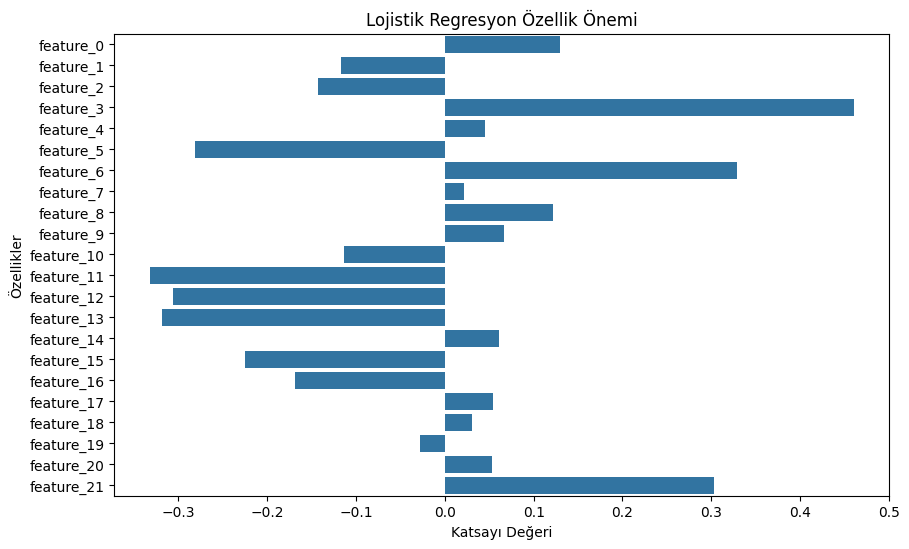

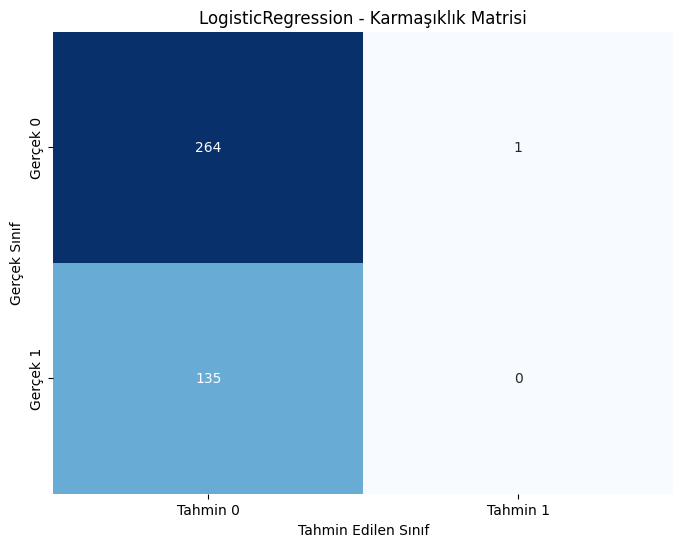

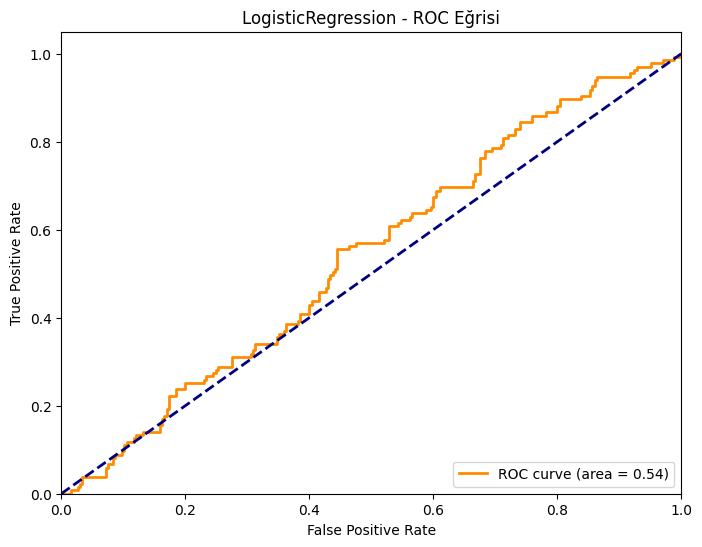

DecisionTreeClassifier eğitimi tamamlandı.


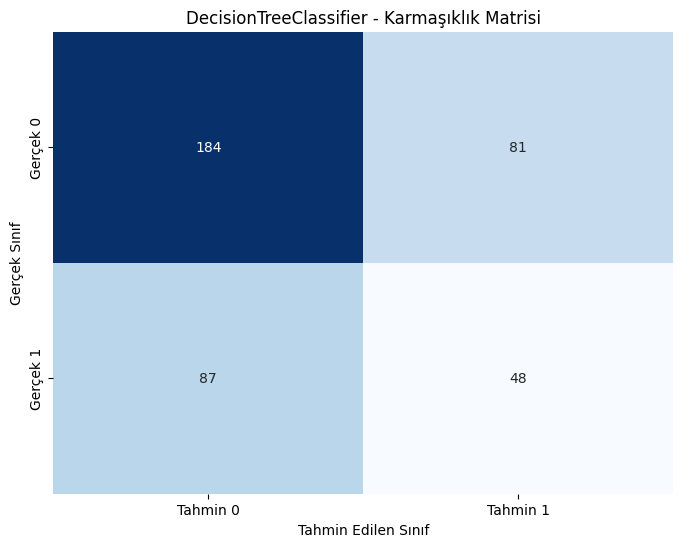

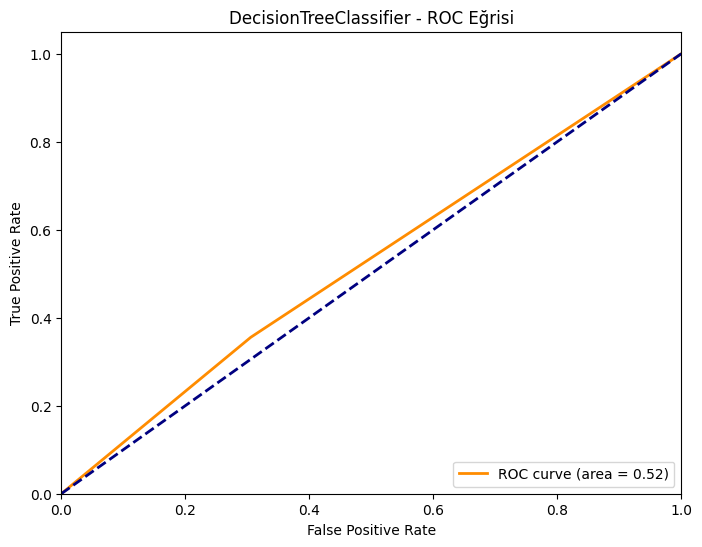

RandomForestClassifier eğitimi tamamlandı.


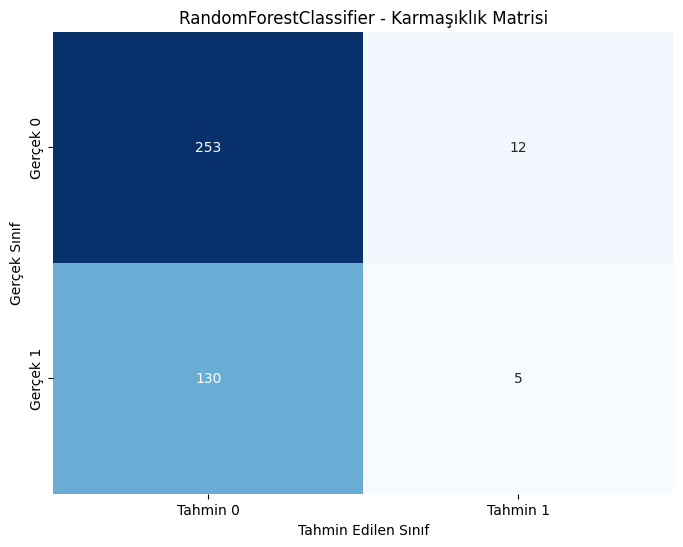

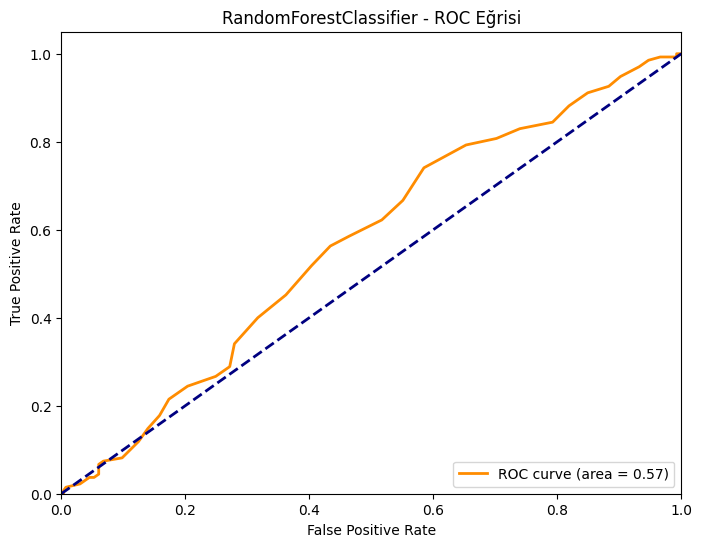

GradientBoostingClassifier eğitimi tamamlandı.


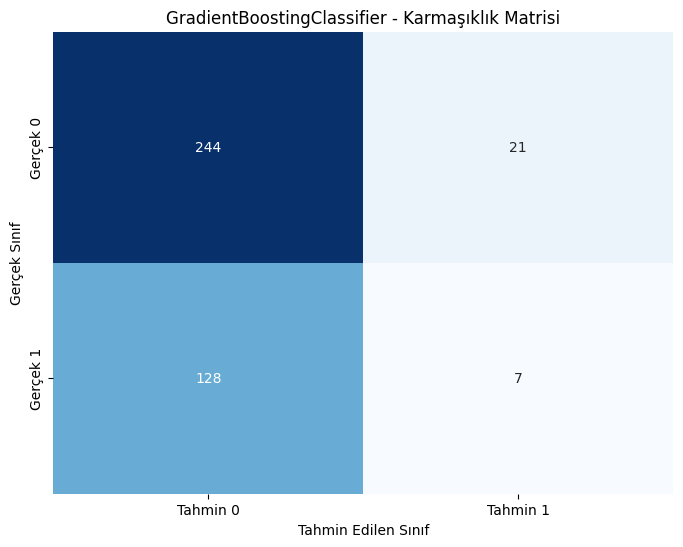

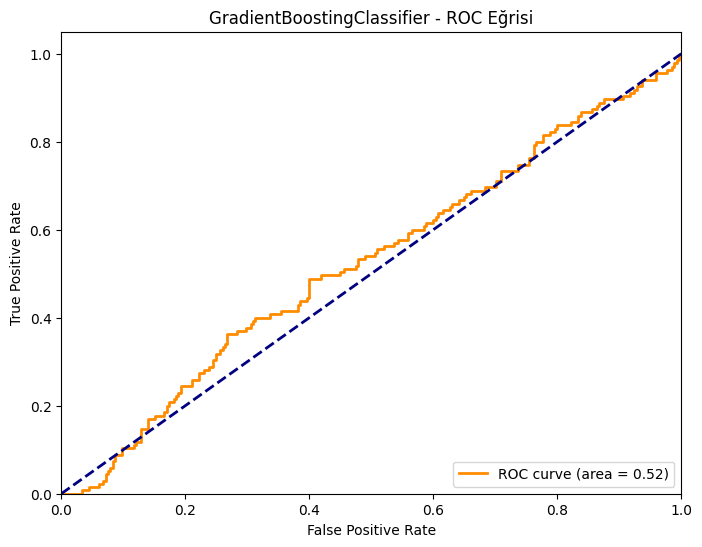

AdaBoostClassifier eğitimi tamamlandı.


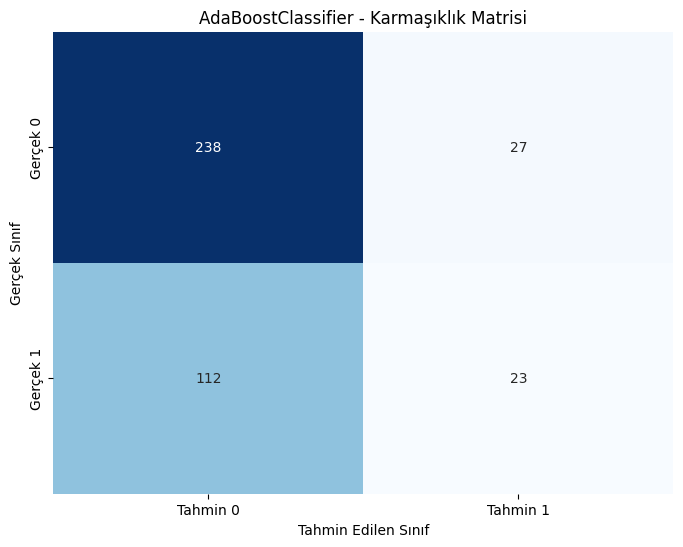

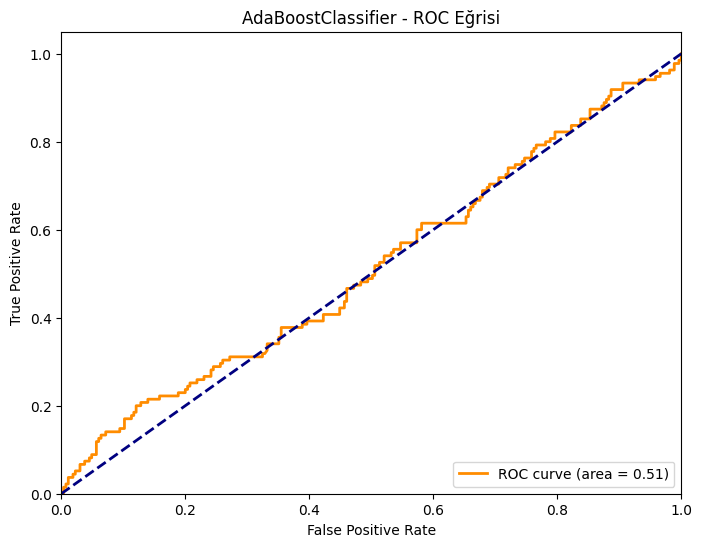

KNeighborsClassifier eğitimi tamamlandı.


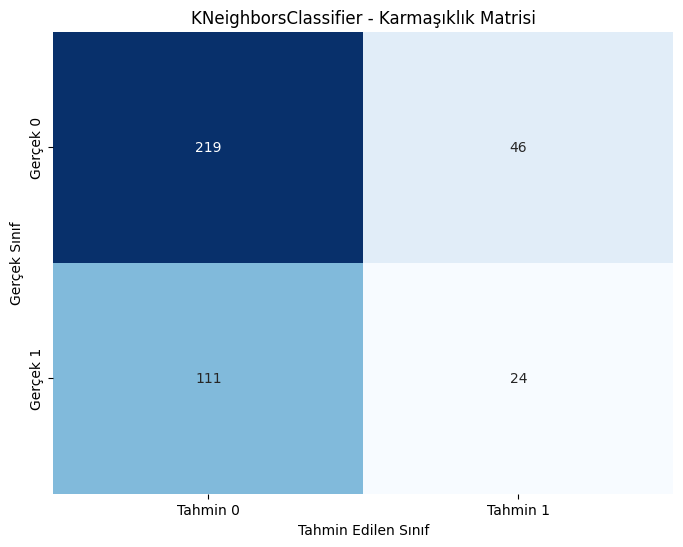

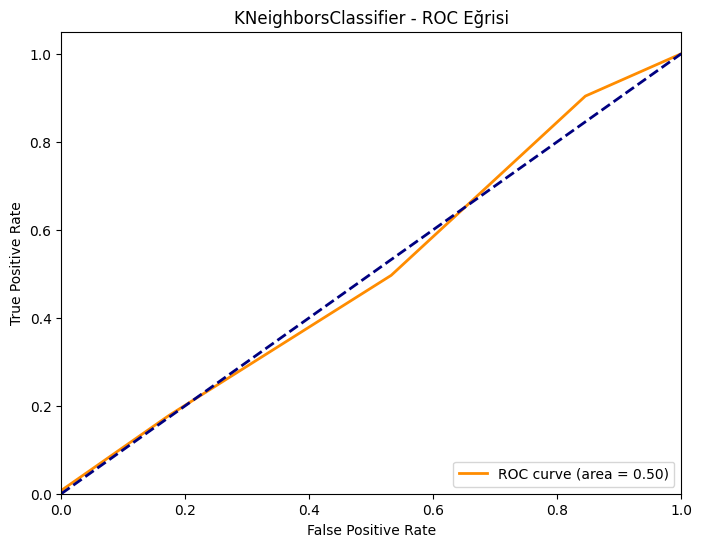

MultinomialNB eğitimi tamamlandı.


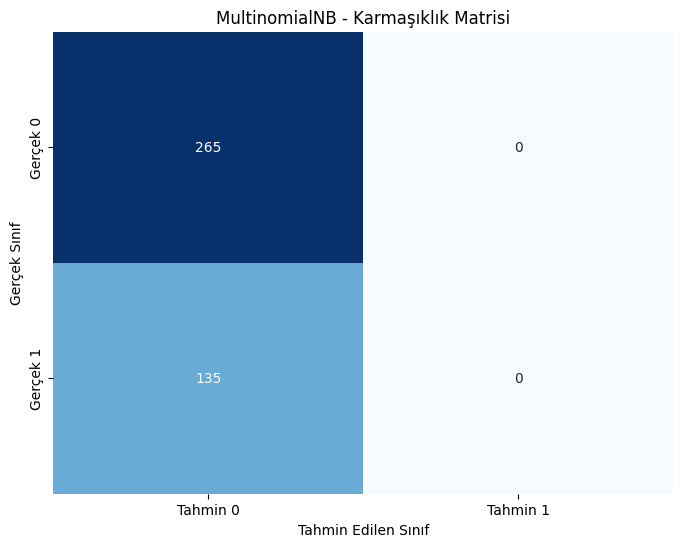

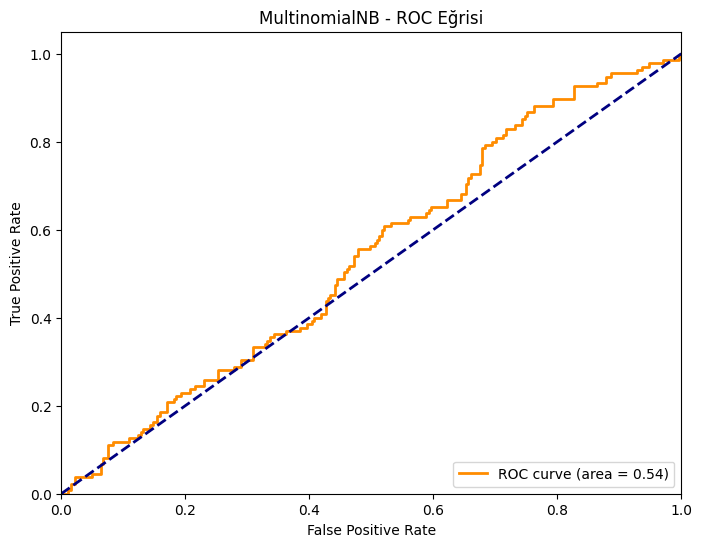


Tüm algoritmaların performans özeti:

                            Accuracy  Precision  Recall        F1
Model                                                            
LogisticRegression            0.6600   0.438346  0.6600  0.526807
DecisionTreeClassifier        0.5800   0.575397  0.5800  0.577578
RandomForestClassifier        0.6450   0.536895  0.6450  0.539526
GradientBoostingClassifier    0.6275   0.518918  0.6275  0.536523
AdaBoostClassifier            0.6525   0.605750  0.6525  0.596683
KNeighborsClassifier          0.6075   0.555373  0.6075  0.566713
MultinomialNB                 0.6625   0.438906  0.6625  0.528008


,Accuracy,Precision,Recall,F1
Model,,,,
LogisticRegression,0.6600,0.438346,0.6600,0.526807
DecisionTreeClassifier,0.5800,0.575397,0.5800,0.577578
RandomForestClassifier,0.6450,0.536895,0.6450,0.539526
GradientBoostingClassifier,0.6275,0.518918,0.6275,0.536523
AdaBoostClassifier,0.6525,0.605750,0.6525,0.596683
KNeighborsClassifier,0.6075,0.555373,0.6075,0.566713
MultinomialNB,0.6625,0.438906,0.6625,0.528008


In [90]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# `algo_test` fonksiyonu burada. Bu fonksiyon, farklı modelleri test eder.
# Daha önceki sohbetimizde oluşturduğumuz fonksiyonu buraya dahil ettim.
def algo_test(x, y, is_scaled=False, is_binary=False):
    """
    Verilen veri setinde çeşitli makine öğrenmesi algoritmalarını test eden bir fonksiyon.
    
    Args:
        x (pd.DataFrame or np.array): Özellikleri içeren veri seti.
        y (pd.Series or np.array): Hedef değişkeni içeren veri seti.
        is_scaled (bool): Verinin MinMaxScaler ile ölçeklenip ölçeklenmediğini belirtir.
        is_binary (bool): Verinin ikili (binary) olup olmadığını belirtir.
    
    Returns:
        pd.DataFrame: Her model için performans metriklerini içeren bir DataFrame.
    """
    # Veriyi eğitim ve test setlerine ayır
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Kullanılacak modelleri tanımla
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000), # max_iter değerini artırdım
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'RandomForestClassifier': RandomForestClassifier(),
        'GradientBoostingClassifier': GradientBoostingClassifier(),
        'AdaBoostClassifier': AdaBoostClassifier(),
        'KNeighborsClassifier': KNeighborsClassifier()
    }

    # Özel Naive Bayes modellerini ekle
    if is_scaled:
        models['MultinomialNB'] = MultinomialNB()
    elif is_binary:
        models['BernoulliNB'] = BernoulliNB()
    else:
        # Gerekli dönüşüm yapılmadıysa MultinomialNB'yi deneme
        print("Uyarı: MultinomialNB için veri uygun şekilde ölçeklenmemiş veya dönüştürülmemiş. Bu model atlanıyor.")

    # Metrikleri saklamak için boş listeler
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl = []
    
    # Modelleri döngüde çalıştır ve performansını değerlendir
    print("Modeller eğitiliyor...")
    for name, model in models.items():
        try:
            model.fit(x_train, y_train)
            pred = model.predict(x_test)
            
            # Metrikleri hesapla ve listeye ekle
            accuracy.append(accuracy_score(y_test, pred))
            precision.append(precision_score(y_test, pred, average='weighted', zero_division=0))
            recall.append(recall_score(y_test, pred, average='weighted', zero_division=0))
            f1.append(f1_score(y_test, pred, average='weighted', zero_division=0))
            mdl.append(name)
            
            print(f"{name} eğitimi tamamlandı.")
            
            # Ek: Lojistik Regresyon için özellik önemini görselleştirme
            if name == 'LogisticRegression':
                # Modelin katsayılarını (coefficient) al
                coefficients = model.coef_[0]
                # Sütun isimleri yoksa varsayılan isimleri kullan
                if isinstance(x, pd.DataFrame):
                    features = x.columns
                else:
                    features = [f'feature_{i}' for i in range(x.shape[1])]
                
                # Özellik önemini görselleştirme
                plt.figure(figsize=(10, 6))
                sns.barplot(x=coefficients, y=features)
                plt.title('Lojistik Regresyon Özellik Önemi')
                plt.xlabel('Katsayı Değeri')
                plt.ylabel('Özellikler')
                plt.show()

            # Ek: Karmaşıklık Matrisi (Confusion Matrix) görselleştirme
            plt.figure(figsize=(8, 6))
            cm = confusion_matrix(y_test, pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                        xticklabels=['Tahmin 0', 'Tahmin 1'],
                        yticklabels=['Gerçek 0', 'Gerçek 1'])
            plt.title(f'{name} - Karmaşıklık Matrisi')
            plt.xlabel('Tahmin Edilen Sınıf')
            plt.ylabel('Gerçek Sınıf')
            plt.show()

            # Ek: ROC Eğrisi (Receiver Operating Characteristic) görselleştirme
            # Modelin tahmin olasılıklarını al
            if hasattr(model, "predict_proba"):
                y_prob = model.predict_proba(x_test)[:, 1]
                fpr, tpr, _ = roc_curve(y_test, y_prob)
                roc_auc = auc(fpr, tpr)
                
                plt.figure(figsize=(8, 6))
                plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
                plt.xlim([0.0, 1.0])
                plt.ylim([0.0, 1.05])
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'{name} - ROC Eğrisi')
                plt.legend(loc="lower right")
                plt.show()
                
        except Exception as e:
            print(f"Hata oluştu {name}: {e}")
            continue

    # Sonuçları bir DataFrame'de birleştir
    metrics_df = pd.DataFrame({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'Model': mdl
    }).set_index('Model')
    
    print("\nTüm algoritmaların performans özeti:\n")
    print(metrics_df)
    
    return metrics_df

# --- Ana Çalışma Alanı ---
# Bu kısım, veri setini yükler, ön işler ve `algo_test` fonksiyonunu çağırır.

# 1. Veri setini yükleme
try:
    df = pd.read_csv('handwriting_personality_large_dataset.csv')
    print("Veri seti başarıyla yüklendi.\n")
except FileNotFoundError:
    print("Hata: 'handwriting_personality_large_dataset.csv' dosyası bulunamadı.")
    exit()

# 2. Kategorik veriyi ikili temsile dönüştürme
# 'Gender' sütununu hedef değişken olarak kullanacağımız için onu y'ye ayırıyoruz.
# Diğer tüm sütunlar özellik (feature) olarak kullanılacak.
df['Gender'] = df['Gender'].str.lower()
df['Gender_encoded'] = np.where(df['Gender'] == 'male', 1, 0)
print("'Gender' sütunu ikili (binary) hale getirildi.")

# 3. Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) ayırma
# 'Handwriting_Sample' gibi model için gereksiz olan sütunları çıkarıyoruz.
x = df.drop(columns=['Handwriting_Sample', 'Gender', 'Gender_encoded'])
y = df['Gender_encoded']

# 4. Numerik olmayan sütunları Label Encoding ile dönüştürme
# Bu, `algo_test` fonksiyonuna beslemeden önce tüm verilerin numerik olmasını sağlar.
for column in x.columns:
    if x[column].dtype == 'object':
        le = LabelEncoder()
        x[column] = x[column].astype(str)
        x[column] = le.fit_transform(x[column])
        print(f"'{column}' sütunu Label Encoding ile dönüştürüldü.")

# 5. `algo_test` fonksiyonunu çağırma
# Bu örnekte, MinMaxScaler ile ölçeklenmiş veriyi kullanarak algoritmaları test ediyoruz.
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

print("\n--- Model Testi Başlıyor ---")
algo_test(x_scaled, y, is_scaled=True)
